In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle5 as pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Task 1

##### LinearRegression().fit(X, y)

Given 

# Task 2

#### Task 2.2.1 - How to Re-sample the Data

In [2]:
train_sets_X = []
train_sets_Y = []
my_data = []
with open('../data/train.pkl', 'rb') as f:
    data = pickle.load(f)
    np.random.shuffle(data)
    my_data = data
    # divide data into 16 sets
    for i in range(16):
        my_arr = data[i*500:(i+1)*500]
        my_arr = my_arr[my_arr[:,0].argsort()]
        train_sets_X.append(my_arr[:,0])
        train_sets_Y.append(my_arr[:,1])

train_sets_X = np.array(train_sets_X)
train_sets_Y = np.array(train_sets_Y)
    

In [3]:
test_sets_X = []
test_sets_Y = []
test_dict = {}
with open('../data/test.pkl', 'rb') as f:
    data = pickle.load(f)
    test_sets_X = data[:,0]
    test_sets_Y = data[:,1]

for i in range(len(test_sets_X)):
    test_dict[test_sets_X[i]] = test_sets_Y[i]

Visualizing training data

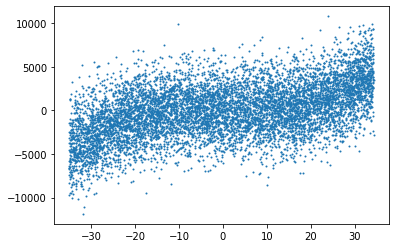

In [4]:
plt.scatter(my_data[:,0], my_data[:,1], s=1)

#### Task 2.2.2 - Calculating Bias and Variance

In [5]:
def regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x = [poly.fit_transform(x[i].reshape(-1, 1)) for i in range(len(x))]
    x = np.array(x)
    regs = [LinearRegression() for i in range(len(x))]
    regs = [regs[i].fit(x[i], y[i]) for i in range(len(x))]

    return [regs[i].predict(x[i]) for i in range(len(x))], [regs[i].coef_ for i in range(len(x))], [regs[i].intercept_ for i in range(len(x))], regs

In [6]:
def regression(x, y, degree):
    '''
    Computes prediction of y given x and degree

    Args:
        x: input data
        y: output data
        degree: degree of polynomial

    Returns:
        y_predicted: predicted output
    '''
    # PolynomialFeatures part
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_sets_X_poly = np.array([poly.fit_transform(x[i].reshape(-1, 1)) for i in range(len(x))])

    # LinearRegression part
    reg = LinearRegression()
    coefs = []
    intercepts = []
    y_predicted = []
    regs = []
    for i in range(len(train_sets_X_poly)):
        reg.fit(train_sets_X_poly[i], y[i])
        y_predicted.append(reg.predict(train_sets_X_poly[i]))
        coefs.append(reg.coef_)
        intercepts.append(reg.intercept_)
        regs.append(reg)
        
    return y_predicted, coefs, intercepts, regs

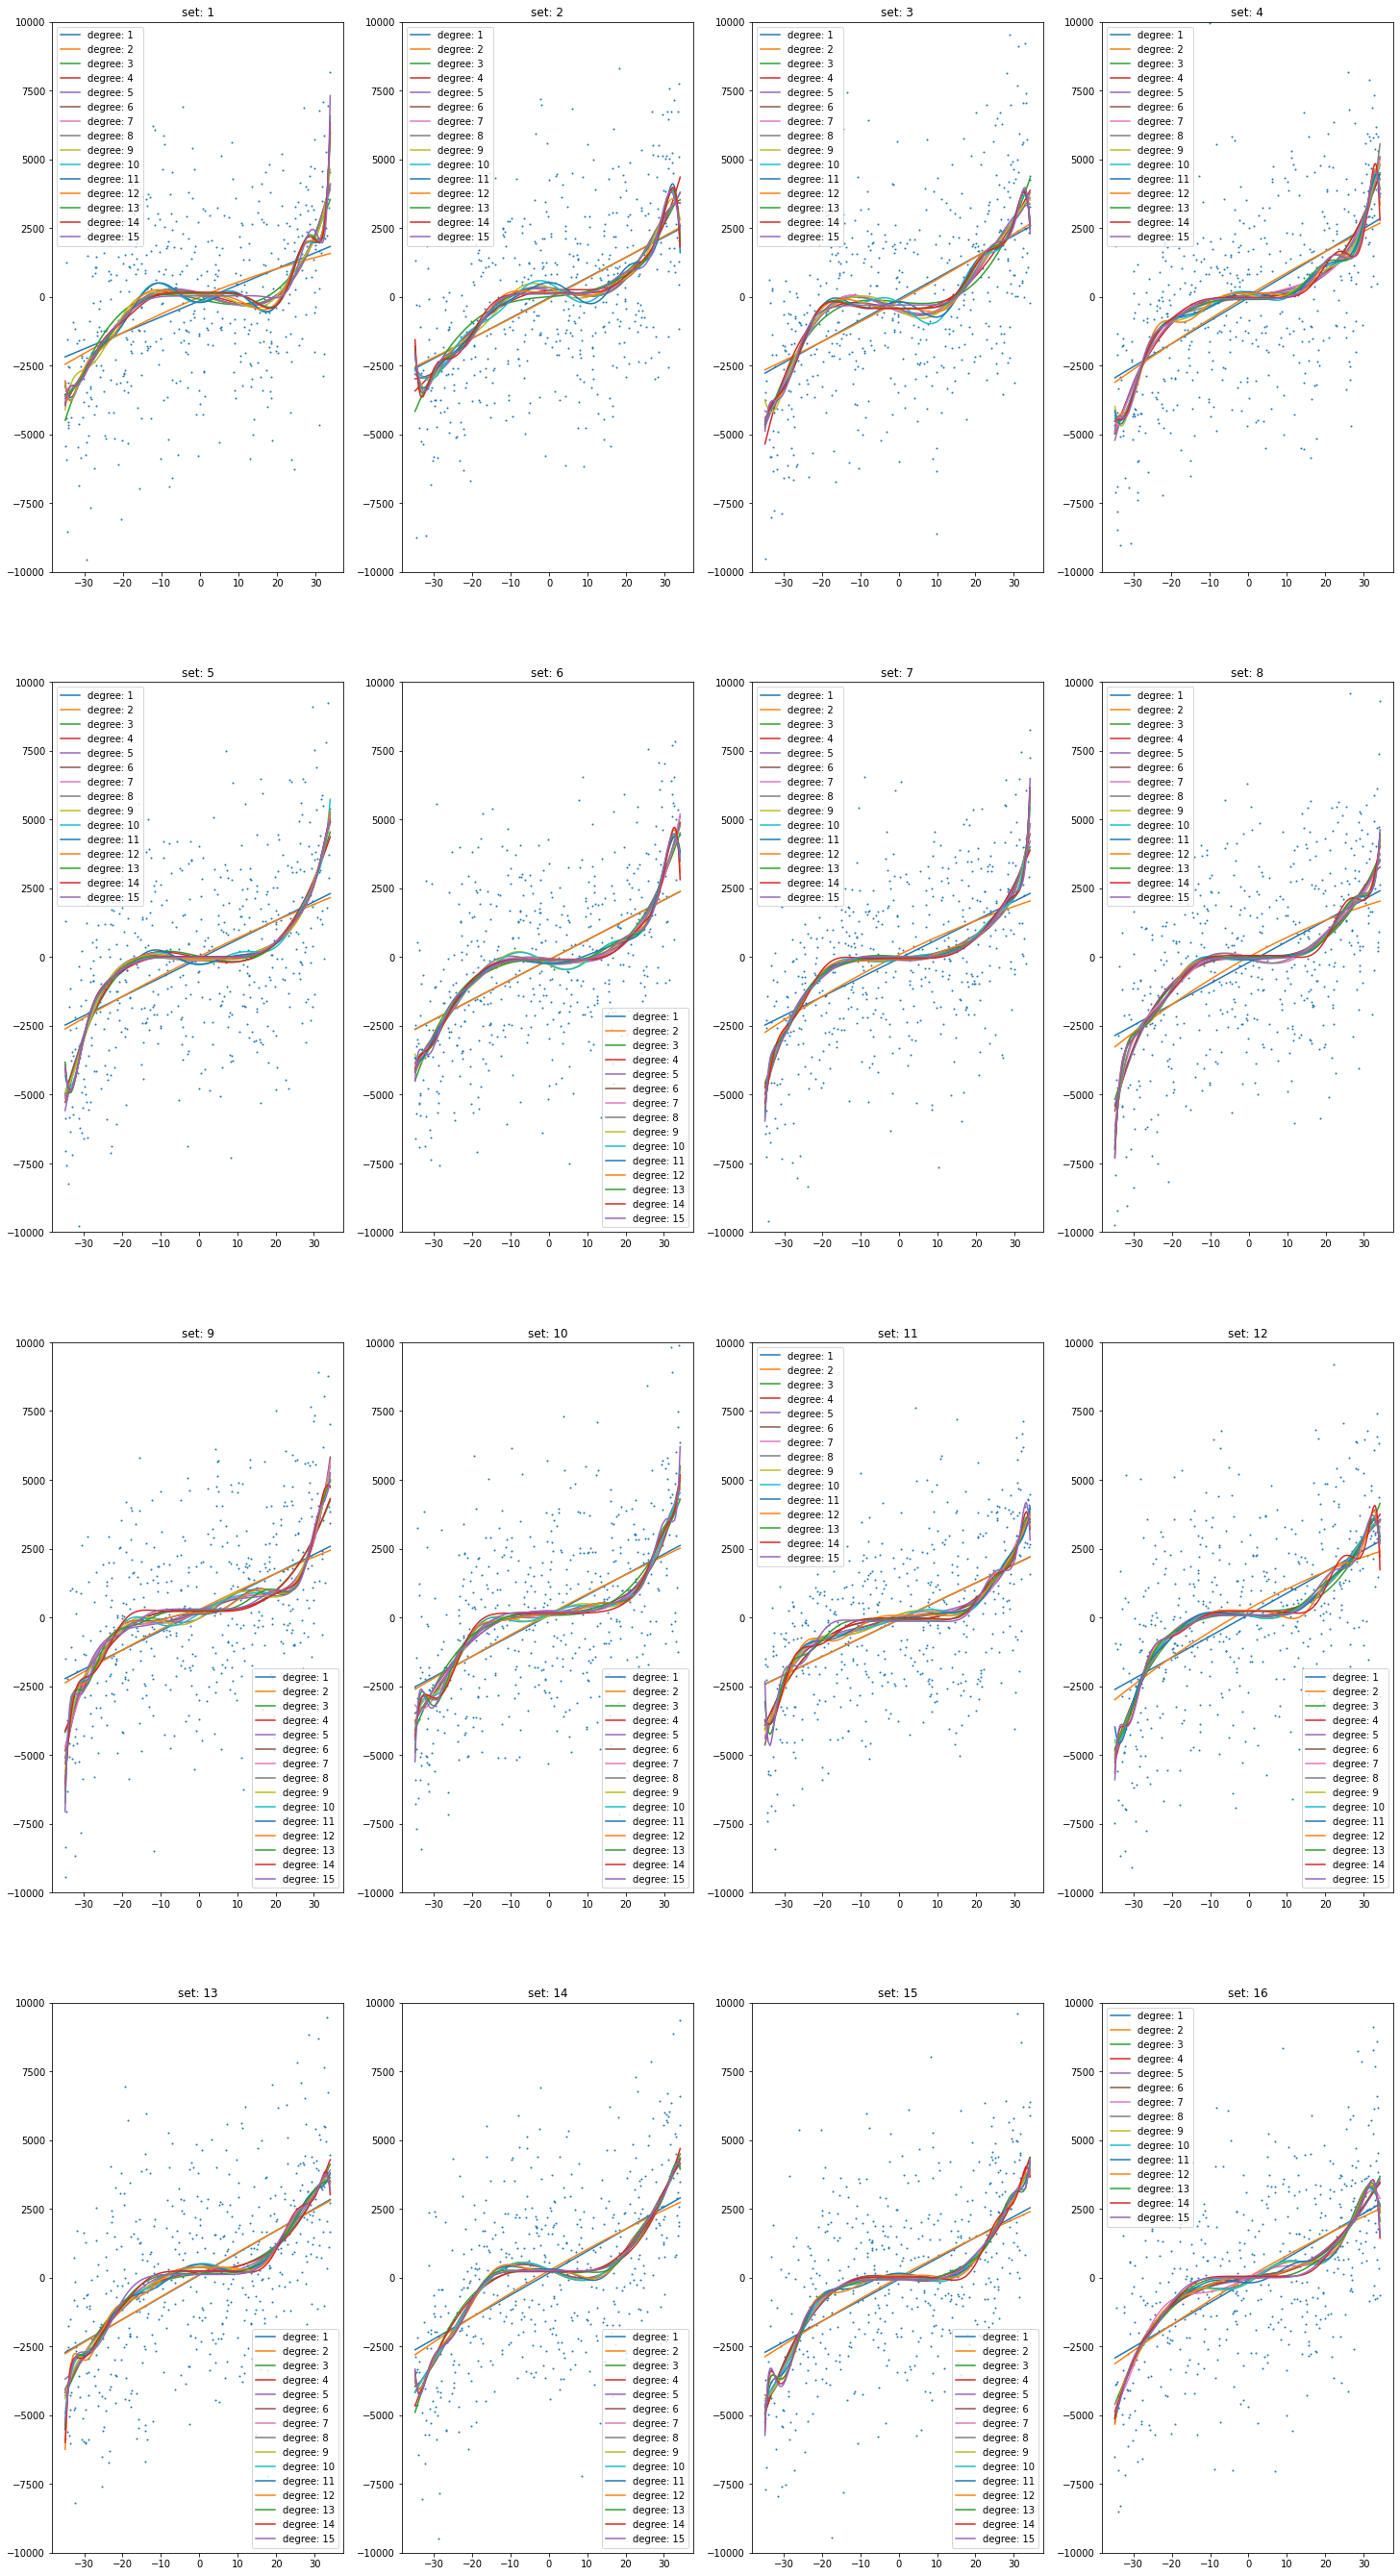

In [7]:
poly_y = []
poly_coefs = []
poly_intercepts = []
poly_regs = []
for i in range(1, 16):
    y_predicted, coefs, intercepts, regs = regression(train_sets_X, train_sets_Y, i)
    poly_y.append(y_predicted)
    poly_coefs.append(coefs)
    poly_intercepts.append(intercepts)
    poly_regs.append(regs)

# Visualizing the training set fits
plt.figure(figsize=(25,200))
for i in range(16):
    plt.subplot(16, 4, i+1)
    plt.scatter(train_sets_X[i], train_sets_Y[i], s=1)
    plt.ylim(-10000, 10000)
    plt.title('set: ' + str(i+1))
    for j in range(15):
        plt.plot(train_sets_X[i], poly_y[j][i], label='degree: ' + str(j+1))
        plt.legend()

In [8]:
def calc_poly(coefs, x):
    ans = 0
    for i in range(len(coefs)):
        ans += coefs[i] * x**(i+1)
    return ans

bias = []
for deg in range(15):
    deg_coefs = np.array(poly_coefs[deg])               # coeffiecients for degree=deg
    deg_intercepts = np.array(poly_intercepts[deg])     # intercepts for degree=deg
    deg_bias = []                                       # bias for degree=deg
    avg_coef = np.mean(deg_coefs, axis=0)               # average coeffiecients for degree=deg
    avg_intercept = np.mean(deg_intercepts, axis=0)     # average intercepts for degree=deg
    for i in range(16):
        bs = 0                                          # bias for set=i
        for j in range(len(test_sets_Y)):
            bs += calc_poly(avg_coef, test_sets_X[j]) + avg_intercept - test_sets_Y[j]
        deg_bias.append(bs/len(test_sets_Y))
    bias.append(deg_bias)

bias = np.array(bias)

variance = []
for deg in range(15):
    deg_coefs = np.array(poly_coefs[deg])               # coeffiecients for degree=deg
    deg_intercepts = np.array(poly_intercepts[deg])     # intercepts for degree=deg
    deg_variance = []                                   # variance for degree=deg
    avg_coef = np.mean(deg_coefs, axis=0)               # average coeffiecients for degree=deg
    avg_intercept = np.mean(deg_intercepts, axis=0)     # average intercepts for degree=deg
    for i in range(16):
        var = 0                                         # variance for set=i
        for j in range(len(test_sets_X)):
            var += (calc_poly(deg_coefs[i] - avg_coef, test_sets_X[j]) + (deg_intercepts[i] - avg_intercept))**2
        deg_variance.append(var/len(test_sets_Y))
    variance.append(deg_variance)

variance = np.array(variance)

# Task 3

In [9]:
mse = []
for deg in range(15):
    deg_coefs = np.array(poly_coefs[deg])               # coeffiecients for degree=deg
    deg_intercepts = np.array(poly_intercepts[deg])     # intercepts for degree=deg
    deg_mse = []                                       # mse for degree=deg
    for i in range(16):
        mse_ = 0                                        # mse for set=i
        for j in range(len(test_sets_X)):
            mse_ += (calc_poly(deg_coefs[i], test_sets_X[j]) + deg_intercepts[i] - test_sets_Y[j])**2
        deg_mse.append(mse_/len(test_sets_Y))
    mse.append(deg_mse)

mse = np.array(mse)

# Task 4

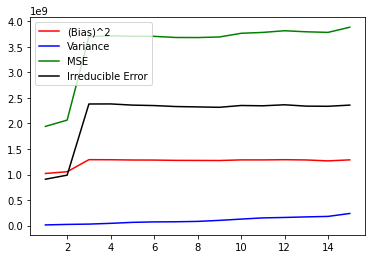

In [10]:
avg_bias = np.mean(bias, axis=1)                     # average bias for each degree
avg_variance = np.mean(variance, axis=1)             # average variance for each degree
avg_mse = np.mean(mse, axis=1)                       # average mse for each degree

plt.plot(range(1,16), avg_bias**2, color='red', label='(Bias)^2')
plt.plot(range(1,16), avg_variance, color='blue', label='Variance')
plt.plot(range(1,16), avg_mse, color='green', label='MSE')
plt.plot(range(1,16), avg_mse - (avg_bias**2 + avg_variance), color='black', label='Irreducible Error')
plt.legend()